# The Singular Value Decomposition

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [3]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

Today we'll study the most useful decomposition in applied Linear Algebra.

Pretty exciting, eh?

The singular value decomposition is a matrix factorization.  

__EVERY__ matrix has a singular value decomposition.

The singular value decomposition (let's just call it SVD) is based on a very simple idea, which is closely related to eigendecomposition.


Recall that the absolute values of the eigenvalues of a symmetric matrix A measures the amount that A stretches or shrinks certain vectors (the eigenvectors).

For example, if $A\vx = \lambda\vx$ and $\Vert x\Vert = 1,$ then

$$\Vert A\vx\Vert = \Vert\lambda\vx\Vert = |\lambda|\,\Vert\vx\Vert = |\lambda|.$$

If $\lambda_1$ is the eigenvalue with the greatest magnitude, then a corresponding unit eigenvector $\vv_1$ identifies a direction in which the stretching effect of $A$ is greatest.

That is, over all unit vectors $\vx$, the length of $A\vx$ is maximized when $\vx = \vv_1$ and $\Vert A\vv_1\Vert = |\lambda_1|$.

Now let's see by example how we can extend this idea to __arbitrary__ (non-square) matrices.

__Example.__

If $A = \mat{{rrr}4&11&14\\8&7&-2},$ then the linear transformation $\vx \mapsto A\vx$ maps the unit sphere $\{\vx : \Vert \vx \Vert = 1\}$ in $\R^3$ onto an ellipse in $\R^2$, as shown here:

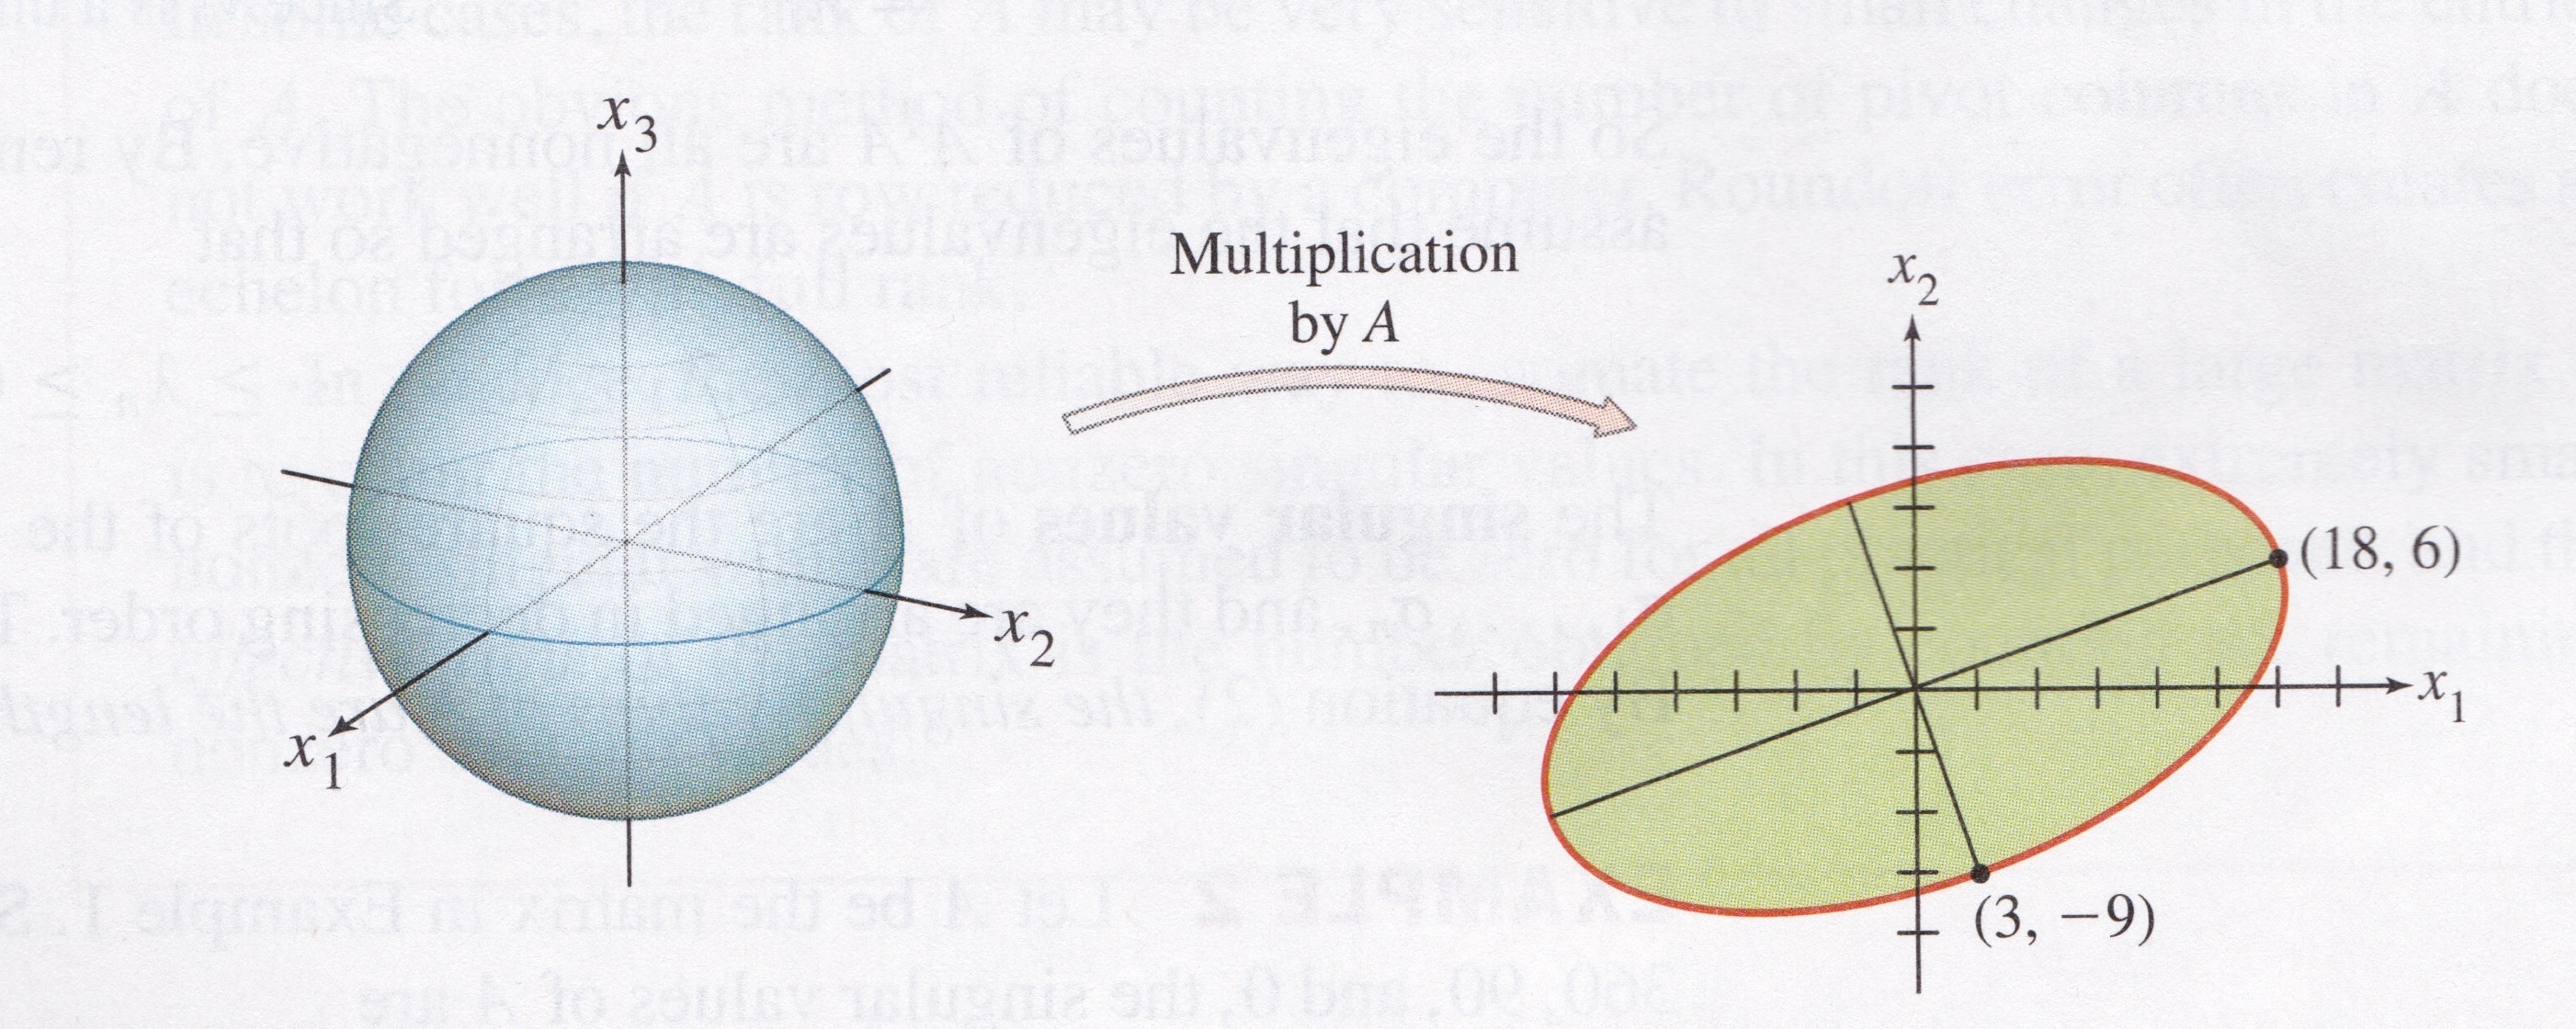

In [7]:
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-7-4-1.jpg", width=650))

Find the unit vector $\vx$ at which the length of $\Vert A\vx\Vert$ is maximized, and compute this maximum length.

__Solution.__

The quantity $\Vert A\vx\Vert^2$ is maximized at the same $\vx$ that maximizes $\Vert A\vx\Vert$, and $\Vert A\vx\Vert^2$ is easier to study.

Observe that

$$ \Vert A\vx\Vert^2 = (A\vx)^T(A\vx) $$

$$ = \vx^TA^TA\vx $$

$$ = \vx^T(A^TA)\vx $$

Now, $A^TA$ is a symmetric matrix.  

So the above is a quadratic form, and we are seeking to maximize it subject to the constraint $\Vert x\Vert = 1$.

As we learned in the last lecture, the maxumum value is the largest eigenvalue $\lambda_1$ of $A^TA$.

Also, the maximum is attained at a unit eigenvector of $A^TA$ corresponding to $\lambda_1$.

For the matrix $A$ in the example,

$$A^TA = \mat{{rr}4&8\\11&7\\14&-2} \,\mat{{rrr}4&11&14\\8&7&-2} = \mat{{rrr}80&100&40\\100&170&140\\40&140&200}.$$

The eigenvalues of $A^TA$ are $\lambda_1 = 360, \lambda_2 = 90,$ and $\lambda_3 = 0.$   Corresponding unit eigenvectors are, respectively, 

$$\vv_1 = \mat{{r}1/3\\2/3\\2/3}$$

## Applications

* $\sigma_k$ is the distance to the closest rank-$k$ matrix.
* The first singular vector is the unit vector with greatest inner product with the data.